100%|██████████| 20000/20000 [00:01<00:00, 17179.38it/s]


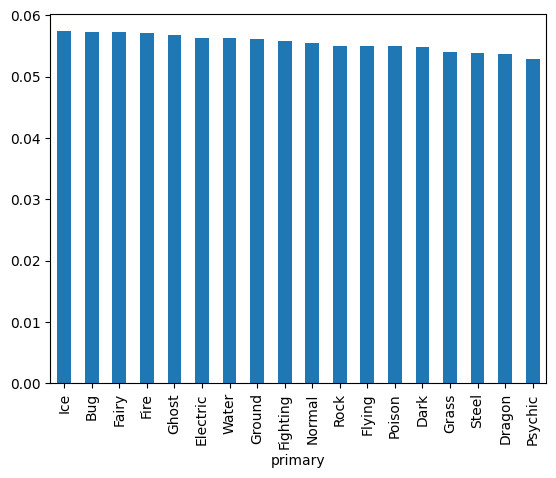

In [1]:
import pandas as pd
import random 
import numpy as np
from glob import glob
from tqdm import tqdm
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import hashlib
from tqdm import tqdm
from PIL import Image
from multiprocessing import Pool
import random
random.seed(0)
np.random.seed(0)


IMGSZ = 224
N_TOTAL = 20000
CORES = 7

df = pd.read_csv("data/parsed_from_index.csv", index_col=0).drop_duplicates("name")
df.primary.value_counts()

def sample_even(n_times):
    
    samples = []
    to_class = df.groupby("primary")["name"].apply(lambda x: list(x))
    with_name = df.set_index("name")
    
    for _ in tqdm(range(n_times)):

        index = random.choice(random.choice(to_class.values))
        row = with_name.loc[index]
        samples.append(row)
    return pd.DataFrame(samples)

samples = sample_even(N_TOTAL)
samples.value_counts("primary", normalize=True).plot.bar()
plt.show()
samples["y_center"] = np.random.uniform(0.15, 0.85, len(samples))
samples["x_center"] = np.random.uniform(0.15, 0.85, len(samples))

samples["width"] = np.random.uniform(0.07, 0.20, len(samples))

samples["upper_corner"] = samples.y_center - samples.width/2
samples["left_corner"] = samples.x_center - samples.width/2

background_image = glob("data/places_imgs/*/*/*.jpg")
samples["background_path"] = np.random.choice(background_image, len(samples))

samples["Id"] = np.arange(len(samples))

In [5]:
background_image = glob("data/places_imgs/**/*.jpg", recursive=True)
len(background_image)

42333

In [21]:
sampels = pd.read_csv("data/test_generated_imgs.csv", index_col=0)
samples

,link,primary,secondary,img_url,image_path,y_center,x_center,width,upper_corner,left_corner,background_path,Id
Gumshoos,/pokedex/gumshoos,Normal,NaN,https://img.pokemondb.net/artwork/large/gumsho...,data/poke_images/885.png,0.534169,0.424521,0.118003,0.475168,0.365519,data/places_imgs/r/restaurant/gsun_b236149aad3...,0
Nidoran♀,/pokedex/nidoran-f,Poison,NaN,https://img.pokemondb.net/artwork/large/nidora...,data/poke_images/40.png,0.650633,0.178810,0.097472,0.601896,0.130073,data/places_imgs/Images/hairsalon/hair_salon_h...,1
Houndstone,/pokedex/houndstone,Ghost,NaN,https://img.pokemondb.net/artwork/large/hounds...,data/poke_images/1152.png,0.571934,0.796310,0.131998,0.505936,0.730312,data/places_imgs/Images/bar/bar_0015.jpg,2
Bonsly,/pokedex/bonsly,Rock,NaN,https://img.pokemondb.net/artwork/large/bonsly...,data/poke_images/537.png,0.531418,0.434364,0.080690,0.491073,0.394019,data/places_imgs/Images/restaurant/restaurante...,3
Chespin,/pokedex/chespin,Grass,NaN,https://img.pokemondb.net/artwork/large/chespi...,data/poke_images/783.png,0.446558,0.810998,0.100896,0.396111,0.760550,data/places_imgs/Images/subway/subway_0076.jpg,4
...,...,...,...,...,...,...,...,...,...,...,...,...
Hitmonlee,/pokedex/hitmonlee,Fighting,NaN,https://img.pokemondb.net/artwork/large/hitmon...,data/poke_images/143.png,0.673722,0.617868,0.184822,0.581311,0.525457,data/places_imgs/p/playground/gsun_c736fc0efc0...,19995
Sliggoo,/pokedex/sliggoo,Dragon,NaN,https://img.pokemondb.net/artwork/large/sliggo...,data/poke_images/841.png,0.358787,0.846438,0.119411,0.299081,0.786733,data/places_imgs/Images/meeting_room/conferenc...,19996
Pichu,/pokedex/pichu,Electric,NaN,https://img.pokemondb.net/artwork/large/pichu.jpg,data/poke_images/225.png,0.462519,0.561757,0.091971,0.416534,0.515771,data/places_imgs/Images/operating_room/operati...,19997
Groudon,/pokedex/groudon,Ground,NaN,https://img.pokemondb.net/artwork/large/groudo...,data/poke_images/472.png,0.402089,0.447230,0.104311,0.349933,0.395075,data/places_imgs/Images/bedroom/b7.jpg,19998


In [ ]:
import os
import shutil
import numpy as np
np.random.seed(0)
from tqdm import tqdm

def split_dataset(base_dir, train_dir='train', val_dir='val', split_ratio=0.2):
    images_path = os.path.join(base_dir, train_dir, 'images')
    labels_path = os.path.join(base_dir, train_dir, 'labels')
    val_images_path = os.path.join(base_dir, val_dir, 'imgs')
    val_labels_path = os.path.join(base_dir, val_dir, 'labels')
    
    # Create validation directories if they don't exist
    os.makedirs(val_images_path, exist_ok=True)
    os.makedirs(val_labels_path, exist_ok=True)
    
    # Get a list of all image files
    all_images = [f for f in os.listdir(images_path) if f.endswith('.jpg')]
    np.random.shuffle(all_images)  # Shuffle the list of images
    
    # Calculate the number of files to move to validation
    num_val = int(len(all_images) * split_ratio)
    
    # Move the selected percentage of images and labels to validation directories
    for img_name in tqdm(all_images[:num_val]):
        # Construct full file paths
        img_file = os.path.join(images_path, img_name)
        label_file = os.path.join(labels_path, img_name.replace('.jpg', '.txt'))
        
        # Move image file
        shutil.move(img_file, val_images_path)
        
        # Check if corresponding label exists before moving
        if os.path.exists(label_file):
            shutil.move(label_file, val_labels_path)

# Example usage
base_directory = 'yolo_images'  # Adjust this to your dataset's path
split_dataset(base_directory)


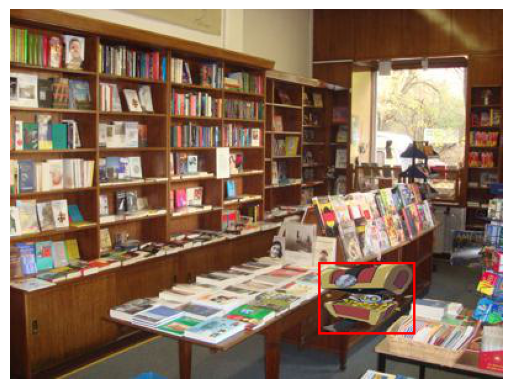

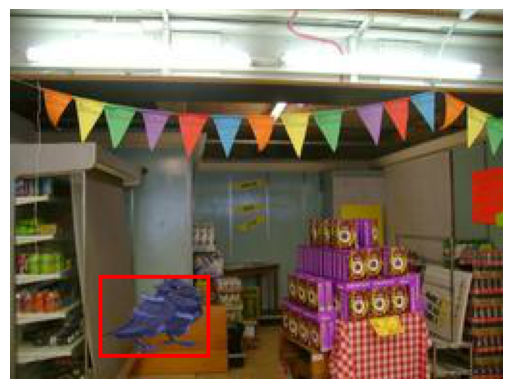

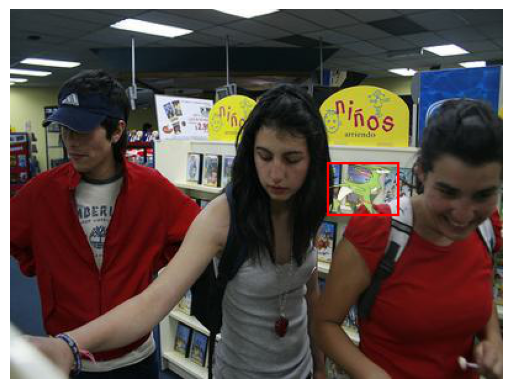

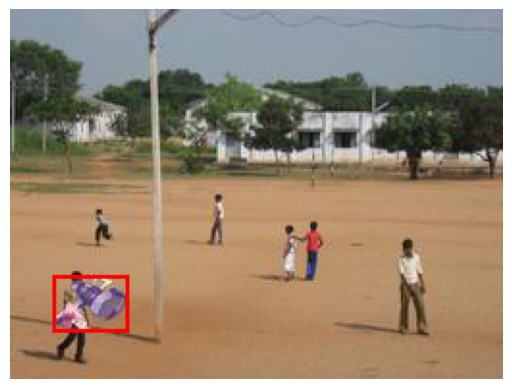

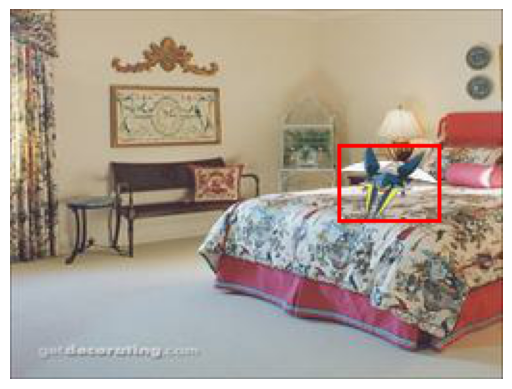

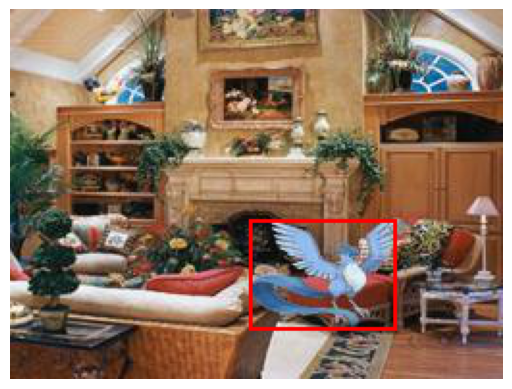

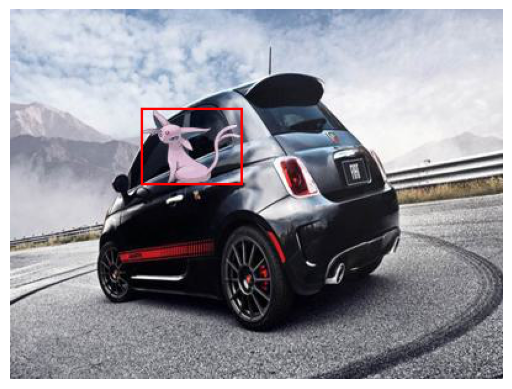

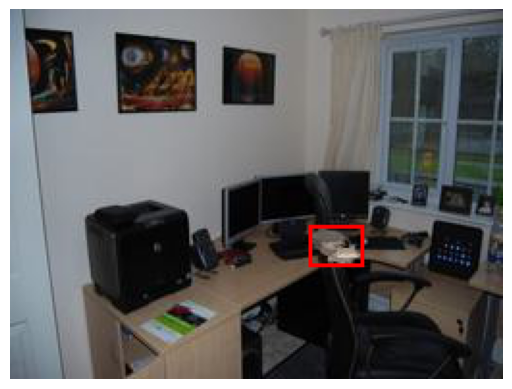

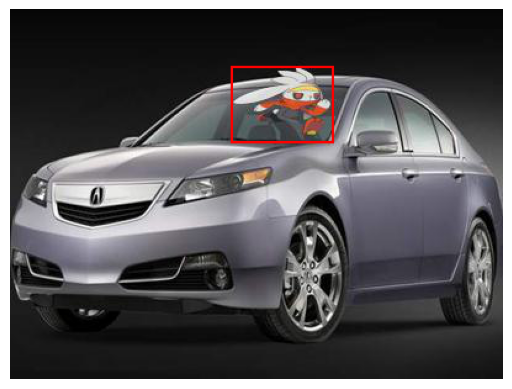

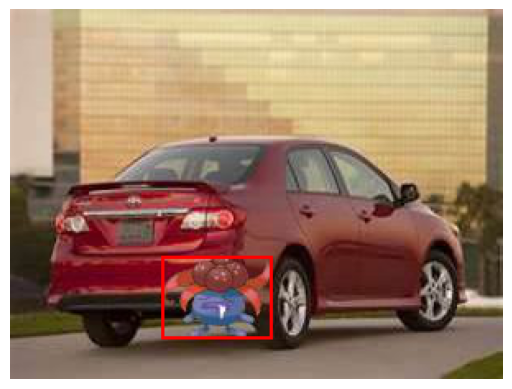

In [27]:


for _,row in samples.sample(10).iterrows():
    
    path = f"data/generated/{row.Id}.jpg"
    with open(f"data/generated_labels/{row.Id}.txt",) as f:
        bbox = list(map(float,f.read().split(" ")))[1:]
    
    
    draw_bbox(path, [bbox])